# UK economy analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:/Users/andre/OneDrive/Área de Trabalho/UK economic data/UK_dataset_df.csv', parse_dates=["Date"])
df

,Date,GDP_growth,real_GDP_per_capta,Debt_%_of_GDP,Inflation,Unemp,Trade_balance_%_GDP,Interest_rate
0,1980-01-01,-2.059,15170,46.3,18.0,6.8,2.2192,14.00
1,1981-01-01,-0.693,15035,47.3,11.9,9.6,2.8588,14.38
2,1982-01-01,1.971,15360,44.9,8.6,10.7,1.9389,10.00
3,1983-01-01,4.198,16004,43.7,4.6,11.5,1.0003,9.06
4,1984-01-01,2.241,16342,43.4,5.0,11.8,-0.0169,9.50
5,1985-01-01,4.125,16983,43.2,6.1,11.4,1.1484,11.38
6,1986-01-01,3.155,17479,42.4,3.4,11.3,-0.5610,10.88
7,1987-01-01,5.396,18382,41.9,4.2,10.4,-0.8959,8.38
8,1988-01-01,5.602,19410,39.3,4.9,8.6,-3.2310,12.88
9,1989-01-01,2.444,19863,34.2,7.8,7.2,-3.6108,14.88


In [3]:
r,c = df.shape
print("The number of columns in the dataset = ",c)
print("The number of rows in the dataset    = ",r)

The number of columns in the dataset =  8
The number of rows in the dataset    =  42


### Cleaning the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 42 non-null     datetime64[ns]
 1   GDP_growth           42 non-null     float64       
 2   real_GDP_per_capta   42 non-null     int64         
 3   Debt_%_of_GDP        42 non-null     float64       
 4   Inflation            42 non-null     float64       
 5   Unemp                42 non-null     float64       
 6   Trade_balance_%_GDP  42 non-null     float64       
 7   Interest_rate        42 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 2.8 KB


In [5]:
# Percentages of missing values
df.isna().sum().sort_values(ascending=False)

Date                   0
GDP_growth             0
real_GDP_per_capta     0
Debt_%_of_GDP          0
Inflation              0
Unemp                  0
Trade_balance_%_GDP    0
Interest_rate          0
dtype: int64

### Understanding the data

In [6]:
df.describe()

,GDP_growth,real_GDP_per_capta,Debt_%_of_GDP,Inflation,Unemp,Trade_balance_%_GDP,Interest_rate
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1.973857,23263.238095,51.742857,4.142857,7.254762,-0.942414,5.599048
std,2.687669,4474.202465,20.982863,3.189552,2.354674,1.404320,4.590016
min,-9.270000,15035.000000,27.700000,-0.500000,3.800000,-3.610800,0.100000
25%,1.656250,19719.750000,37.725000,2.450000,5.225000,-1.859425,0.562500
50%,2.312500,24711.500000,42.800000,3.350000,7.000000,-1.259800,5.440000
75%,3.020250,27265.250000,72.950000,4.600000,8.825000,-0.093825,8.890000
max,7.441000,28982.000000,103.700000,18.000000,11.800000,2.858800,14.880000


In [7]:
# The mean GDP growth since 1980 is 1.97% and GDP per capita is £23,263. It is also interesting to see that the mean of the 
# trade balance is -0.94

### GDP Growth

In [8]:
df['GDP_growth']

0    -2.059
1    -0.693
2     1.971
3     4.198
4     2.241
5     4.125
6     3.155
7     5.396
8     5.602
9     2.444
10    0.634
11   -1.186
12    0.313
13    2.401
14    3.768
15    2.444
16    2.428
17    4.909
18    3.154
19    2.990
20    3.672
21    2.073
22    2.123
23    3.030
24    2.356
25    2.593
26    2.584
27    2.269
28   -0.240
29   -4.247
30    2.131
31    1.458
32    1.470
33    1.890
34    2.991
35    2.623
36    2.263
37    2.134
38    1.651
39    1.672
40   -9.270
41    7.441
Name: GDP_growth, dtype: float64

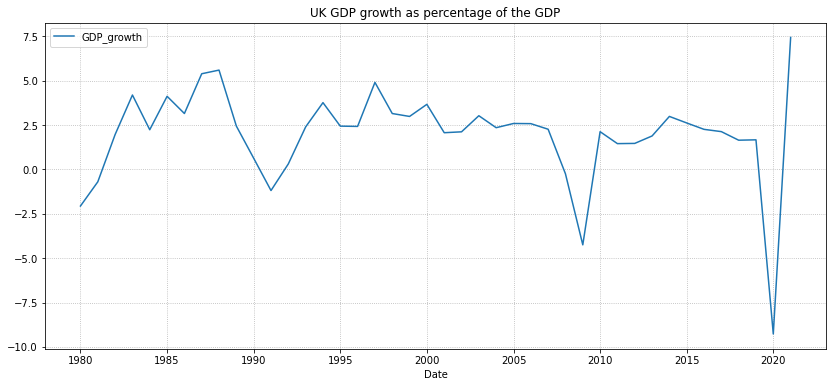

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df.GDP_growth, label='GDP_growth')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('UK GDP growth as percentage of the GDP')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_growth', ylabel='Density'>

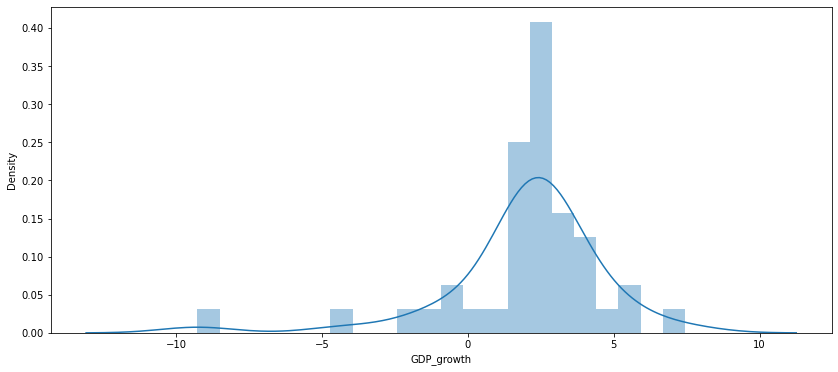

In [10]:
# Let's check the distribution of accidents with a histogram
sns.distplot(df['GDP_growth'])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  2.,  2.,  2.,
        13., 11.,  2.,  3.,  2.,  0.,  1.]),
 array([-9.27   , -8.43445, -7.5989 , -6.76335, -5.9278 , -5.09225,
        -4.2567 , -3.42115, -2.5856 , -1.75005, -0.9145 , -0.07895,
         0.7566 ,  1.59215,  2.4277 ,  3.26325,  4.0988 ,  4.93435,
         5.7699 ,  6.60545,  7.441  ]),
 <BarContainer object of 20 artists>)

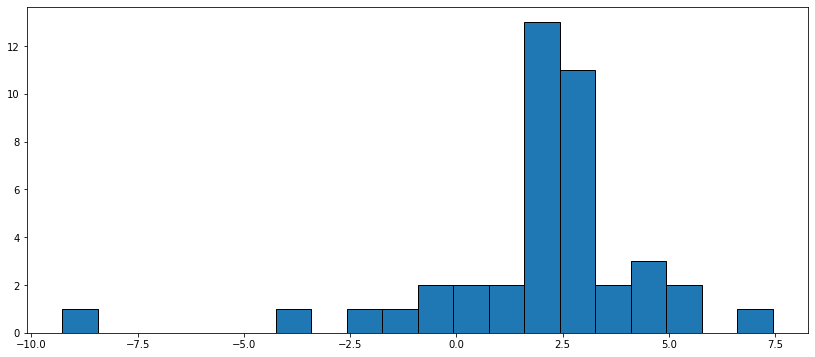

In [11]:
plt.hist(df['GDP_growth'], edgecolor='black', bins=20)

In [12]:
from scipy.stats import shapiro 

In [13]:
#perform Shapiro-Wilk test for normality
shapiro(df['GDP_growth'])

ShapiroResult(statistic=0.8211809396743774, pvalue=1.293559489567997e-05)

In [14]:
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### real_GDP_per_capta

In [15]:
df['real_GDP_per_capta']

0     15170
1     15035
2     15360
3     16004
4     16342
5     16983
6     17479
7     18382
8     19410
9     19863
10    19954
11    19669
12    19672
13    20105
14    20814
15    21250
16    21712
17    22305
18    23031
19    23754
20    24402
21    25021
22    25550
23    26342
24    26778
25    27284
26    27669
27    28237
28    27766
29    26453
30    26775
31    26915
32    27206
33    27544
34    28257
35    28693
36    28982
37    27209
38    27342
39    27477
40    25417
41    27443
Name: real_GDP_per_capta, dtype: int64

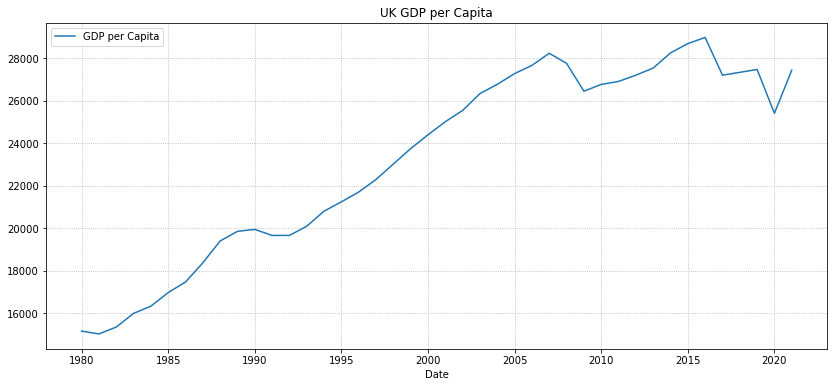

In [16]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df.real_GDP_per_capta, label='GDP per Capita')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('UK GDP per Capita')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='real_GDP_per_capta', ylabel='Density'>

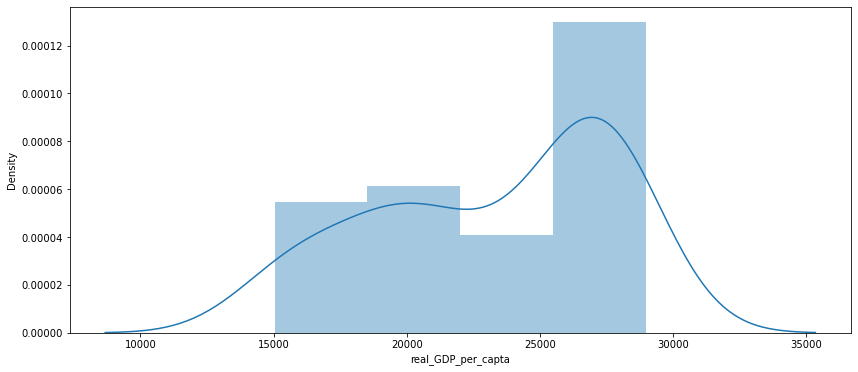

In [17]:
# Let's check the distribution of accidents with a histogram
sns.distplot(df['real_GDP_per_capta'])

(array([3., 2., 1., 1., 1., 0., 4., 2., 2., 1., 1., 1., 1., 1., 2., 1., 4.,
        8., 4., 2.]),
 array([15035.  , 15732.35, 16429.7 , 17127.05, 17824.4 , 18521.75,
        19219.1 , 19916.45, 20613.8 , 21311.15, 22008.5 , 22705.85,
        23403.2 , 24100.55, 24797.9 , 25495.25, 26192.6 , 26889.95,
        27587.3 , 28284.65, 28982.  ]),
 <BarContainer object of 20 artists>)

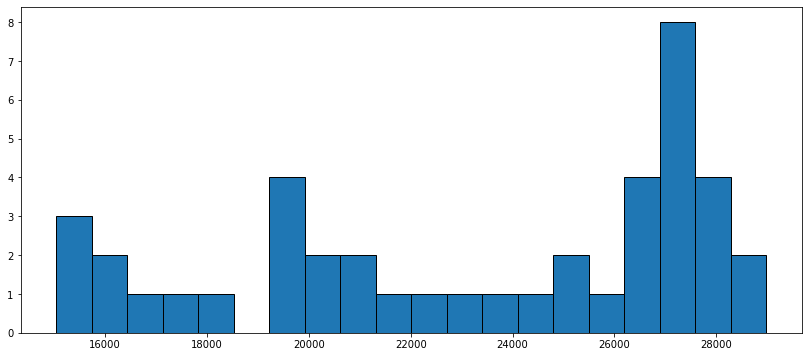

In [18]:
plt.hist(df['real_GDP_per_capta'], edgecolor='black', bins=20)

In [19]:
#perform Shapiro-Wilk test for normality
shapiro(df['real_GDP_per_capta'])

ShapiroResult(statistic=0.8920344710350037, pvalue=0.0008386419503949583)

In [20]:
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### Debt as a percentage of the GDP

In [21]:
df['Debt_%_of_GDP']

0      46.3
1      47.3
2      44.9
3      43.7
4      43.4
5      43.2
6      42.4
7      41.9
8      39.3
9      34.2
10     29.7
11     27.7
12     28.6
13     33.6
14     38.1
15     41.4
16     43.6
17     43.4
18     41.8
19     39.9
20     37.6
21     34.8
22     33.3
23     33.6
24     35.2
25     37.6
26     38.8
27     39.8
28     40.5
29     51.8
30     68.6
31     74.4
32     80.3
33     82.1
34     83.7
35     84.9
36     84.5
37     84.3
38     83.5
39     82.8
40     83.0
41    103.7
Name: Debt_%_of_GDP, dtype: float64

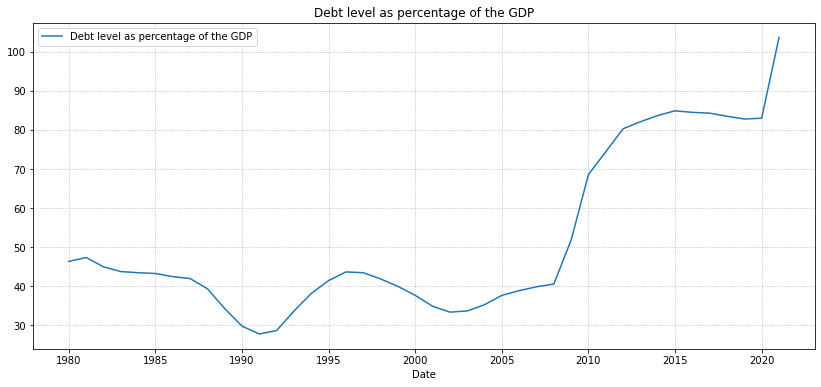

In [22]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df['Debt_%_of_GDP'], label='Debt level as percentage of the GDP')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('Debt level as percentage of the GDP')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Debt_%_of_GDP', ylabel='Density'>

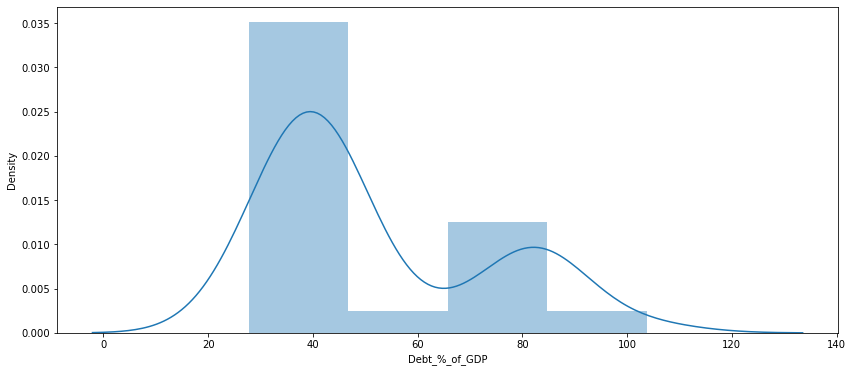

In [23]:
# Let's check the distribution of accidents with a histogram
sns.distplot(df['Debt_%_of_GDP'])

(array([3., 6., 4., 8., 7., 1., 1., 0., 0., 0., 1., 0., 1., 1., 7., 1., 0.,
        0., 0., 1.]),
 array([ 27.7,  31.5,  35.3,  39.1,  42.9,  46.7,  50.5,  54.3,  58.1,
         61.9,  65.7,  69.5,  73.3,  77.1,  80.9,  84.7,  88.5,  92.3,
         96.1,  99.9, 103.7]),
 <BarContainer object of 20 artists>)

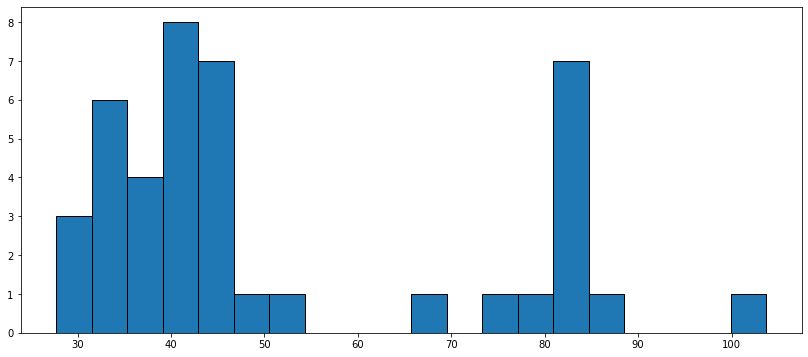

In [24]:
plt.hist(df['Debt_%_of_GDP'], edgecolor='black', bins=20)

In [25]:
#perform Shapiro-Wilk test for normality
shapiro(df['Debt_%_of_GDP'])

ShapiroResult(statistic=0.8065618872642517, pvalue=6.129741905169794e-06)

In [26]:
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### Inflation

In [27]:
df['Inflation']

0     18.0
1     11.9
2      8.6
3      4.6
4      5.0
5      6.1
6      3.4
7      4.2
8      4.9
9      7.8
10     9.5
11     5.9
12     3.7
13     1.6
14     2.4
15     3.5
16     2.4
17     3.1
18     3.4
19     1.5
20     3.0
21     1.8
22     1.7
23     2.9
24     3.0
25     2.8
26     3.2
27     4.3
28     4.0
29    -0.5
30     4.6
31     5.2
32     3.2
33     3.0
34     2.4
35     1.0
36     1.8
37     3.6
38     3.3
39     2.6
40     1.5
41     4.1
Name: Inflation, dtype: float64

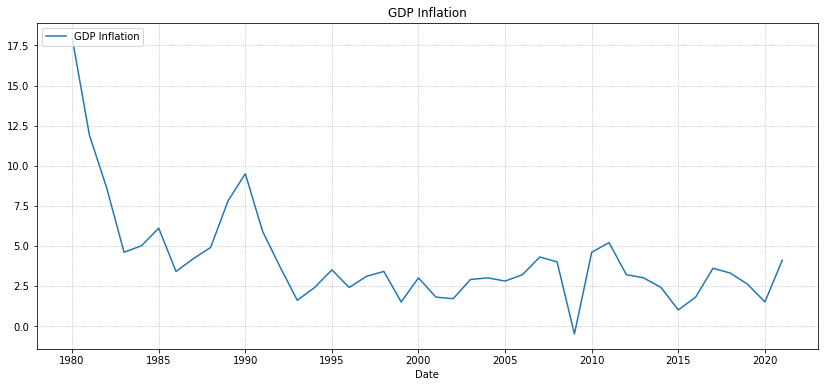

In [28]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df.Inflation, label='GDP Inflation')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('GDP Inflation')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inflation', ylabel='Density'>

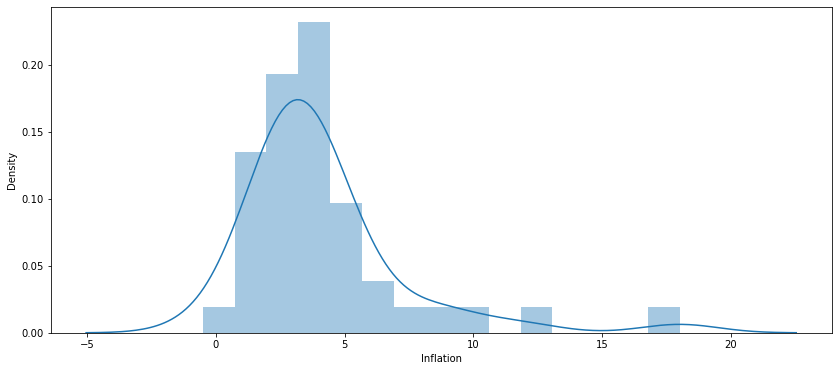

In [29]:
# Let's check the distribution of accidents with a histogram
sns.distplot(df['Inflation'])

(array([ 1.,  1.,  6., 10., 10.,  6.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.5  ,  0.425,  1.35 ,  2.275,  3.2  ,  4.125,  5.05 ,  5.975,
         6.9  ,  7.825,  8.75 ,  9.675, 10.6  , 11.525, 12.45 , 13.375,
        14.3  , 15.225, 16.15 , 17.075, 18.   ]),
 <BarContainer object of 20 artists>)

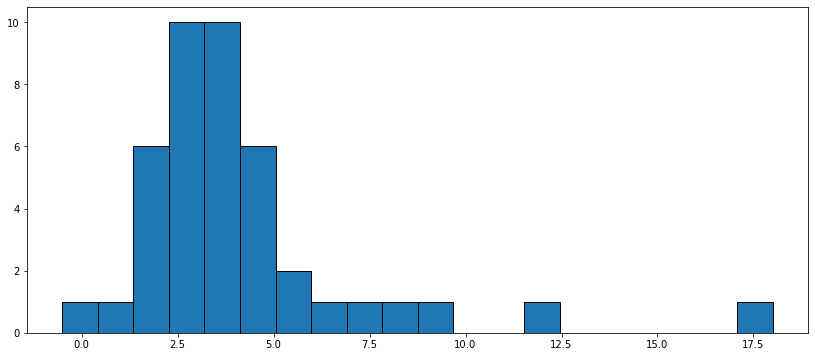

In [30]:
plt.hist(df['Inflation'], edgecolor='black', bins=20)

In [31]:
#perform Shapiro-Wilk test for normality
shapiro(df['Inflation'])

ShapiroResult(statistic=0.7624033689498901, pvalue=7.664374948035402e-07)

In [32]:
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### Unemp

In [33]:
df['Unemp']

0      6.8
1      9.6
2     10.7
3     11.5
4     11.8
5     11.4
6     11.3
7     10.4
8      8.6
9      7.2
10     7.1
11     8.9
12     9.9
13    10.4
14     9.5
15     8.6
16     8.1
17     6.9
18     6.2
19     6.0
20     5.4
21     5.1
22     5.2
23     5.0
24     4.8
25     4.8
26     5.4
27     5.3
28     5.7
29     7.6
30     7.9
31     8.1
32     8.0
33     7.6
34     6.2
35     5.4
36     4.9
37     4.4
38     4.1
39     3.8
40     4.6
41     4.5
Name: Unemp, dtype: float64

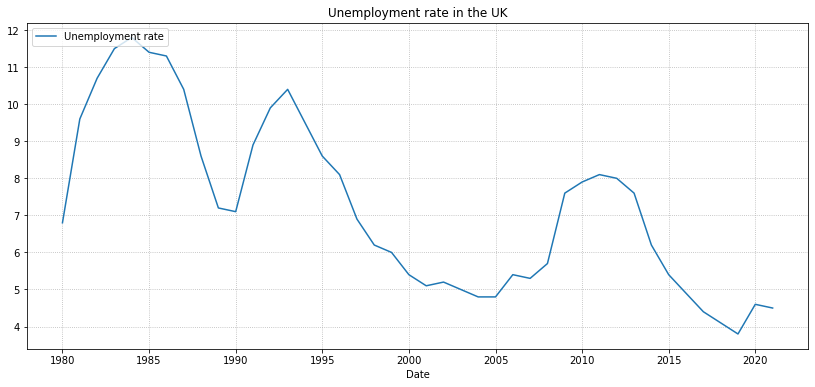

In [34]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df.Unemp, label='Unemployment rate')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('Unemployment rate in the UK')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemp', ylabel='Density'>

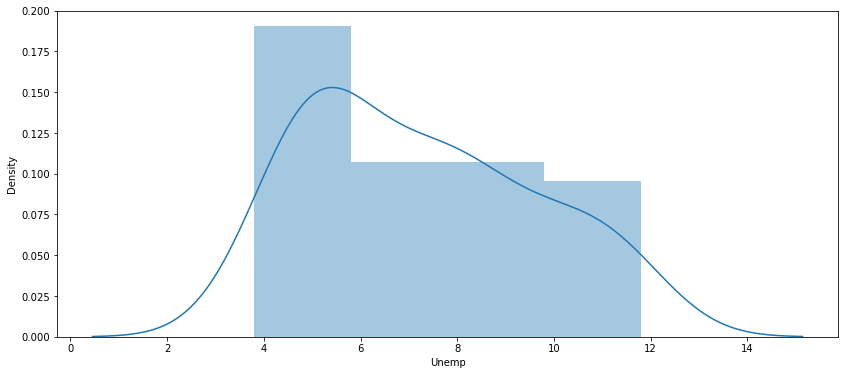

In [35]:
# Let's check the distribution of accidents with a histogram
sns.distplot(df['Unemp'])

(array([2., 2., 4., 4., 4., 1., 2., 2., 2., 2., 4., 2., 1., 0., 2., 1., 2.,
        1., 1., 3.]),
 array([ 3.8,  4.2,  4.6,  5. ,  5.4,  5.8,  6.2,  6.6,  7. ,  7.4,  7.8,
         8.2,  8.6,  9. ,  9.4,  9.8, 10.2, 10.6, 11. , 11.4, 11.8]),
 <BarContainer object of 20 artists>)

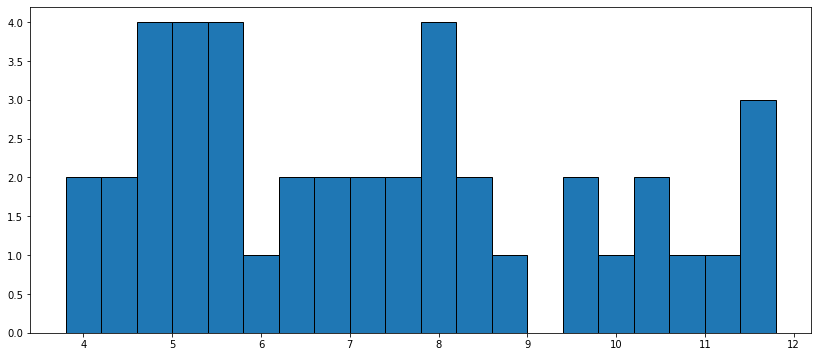

In [36]:
plt.hist(df['Unemp'], edgecolor='black', bins=20)

In [37]:
#perform Shapiro-Wilk test for normality
shapiro(df['Unemp'])

ShapiroResult(statistic=0.9328194260597229, pvalue=0.01614578627049923)

In [38]:
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### Trade Balance as a percentage of the GDP

In [39]:
df['Trade_balance_%_GDP']

0     2.2192
1     2.8588
2     1.9389
3     1.0003
4    -0.0169
5     1.1484
6    -0.5610
7    -0.8959
8    -3.2310
9    -3.6108
10   -1.8148
11   -0.3431
12   -0.6803
13   -0.3246
14    0.0170
15    0.3148
16    0.2193
17    0.3157
18   -0.7686
19   -1.4285
20   -1.6513
21   -2.0929
22   -2.6304
23   -2.2261
24   -2.5433
25   -2.3480
26   -2.0593
27   -2.0422
28   -2.0620
29   -1.4741
30   -1.8743
31   -1.0044
32   -1.2318
33   -1.3069
34   -1.7642
35   -1.5467
36   -1.6377
37   -1.2634
38   -1.3014
39   -0.9173
40    0.2956
41   -1.2562
Name: Trade_balance_%_GDP, dtype: float64

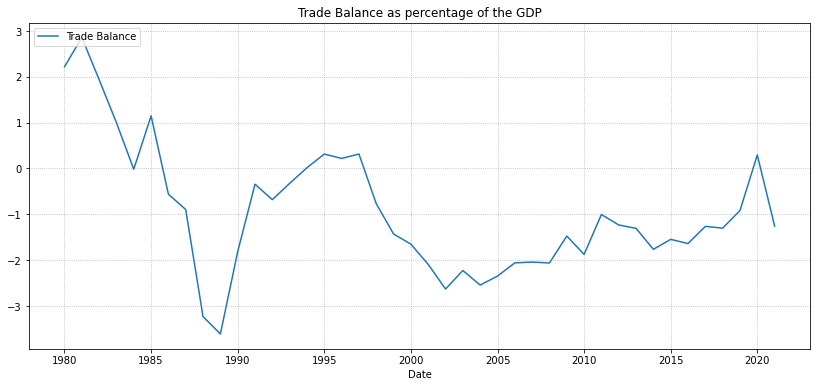

In [40]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df['Trade_balance_%_GDP'], label='Trade Balance')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('Trade Balance as percentage of the GDP')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trade_balance_%_GDP', ylabel='Density'>

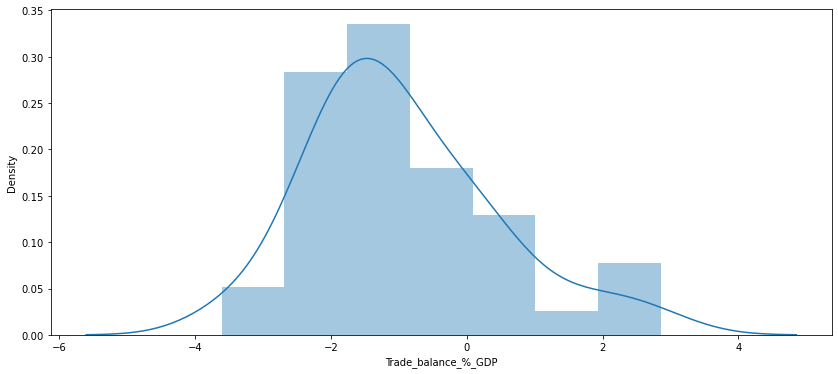

In [41]:
# Let's check the distribution of accidents with a histogram
sns.distplot(df['Trade_balance_%_GDP'])

(array([1., 1., 0., 3., 5., 3., 5., 5., 4., 2., 2., 3., 3., 0., 2., 0., 0.,
        1., 1., 1.]),
 array([-3.6108 , -3.28732, -2.96384, -2.64036, -2.31688, -1.9934 ,
        -1.66992, -1.34644, -1.02296, -0.69948, -0.376  , -0.05252,
         0.27096,  0.59444,  0.91792,  1.2414 ,  1.56488,  1.88836,
         2.21184,  2.53532,  2.8588 ]),
 <BarContainer object of 20 artists>)

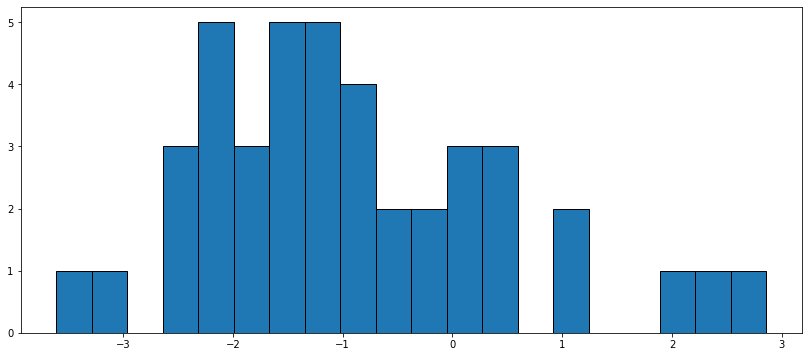

In [42]:
plt.hist(df['Trade_balance_%_GDP'], edgecolor='black', bins=20)

In [43]:
#perform Shapiro-Wilk test for normality
shapiro(df['Trade_balance_%_GDP'])

ShapiroResult(statistic=0.9561819434165955, pvalue=0.10770387947559357)

In [44]:
# Since the p-value is greater than .05, we fail to reject the null hypothesis of the Shapiro-Wilk test.
# This means we do have sufficient evidence to say that the sample data comes from a normal distribution.

### Interest Rate

In [45]:
df['Interest_rate']

0     14.00
1     14.38
2     10.00
3      9.06
4      9.50
5     11.38
6     10.88
7      8.38
8     12.88
9     14.88
10    13.88
11    10.38
12     6.88
13     5.38
14     6.13
15     6.38
16     5.94
17     7.25
18     6.25
19     5.50
20     6.00
21     4.00
22     4.00
23     3.75
24     4.75
25     4.50
26     5.00
27     5.50
28     2.00
29     0.50
30     0.50
31     0.50
32     0.50
33     0.50
34     0.50
35     0.50
36     0.25
37     0.50
38     0.75
39     1.00
40     0.10
41     0.25
Name: Interest_rate, dtype: float64

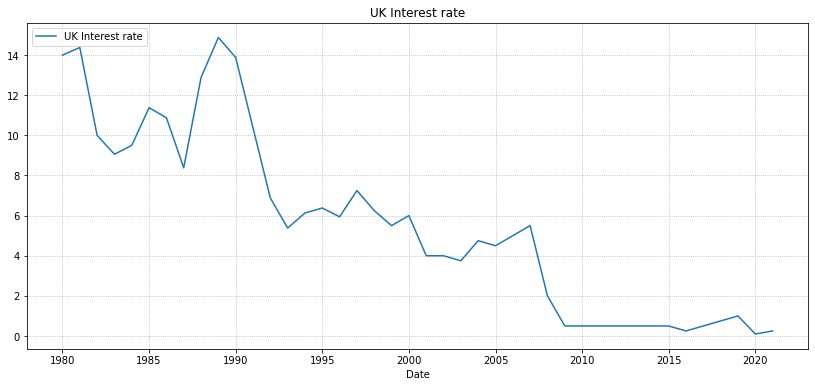

In [46]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df['Interest_rate'], label='UK Interest rate')
plt.legend(loc=2)
plt.xlabel('Date')
plt.title('UK Interest rate')
plt.grid(True, linestyle=':')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_rate', ylabel='Density'>

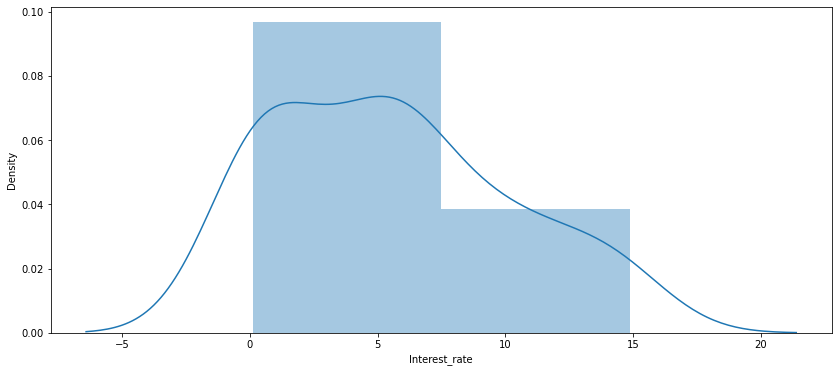

In [47]:
# Let's check the distribution of accidents with a histogram
sns.distplot(df['Interest_rate'])

(array([12.,  1.,  1.,  0.,  1.,  3.,  2.,  5.,  3.,  2.,  0.,  1.,  2.,
         2.,  1.,  1.,  0.,  1.,  2.,  2.]),
 array([ 0.1  ,  0.839,  1.578,  2.317,  3.056,  3.795,  4.534,  5.273,
         6.012,  6.751,  7.49 ,  8.229,  8.968,  9.707, 10.446, 11.185,
        11.924, 12.663, 13.402, 14.141, 14.88 ]),
 <BarContainer object of 20 artists>)

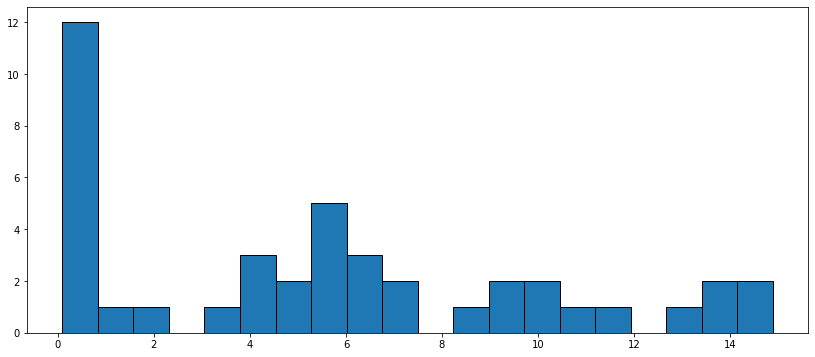

In [48]:
plt.hist(df['Interest_rate'], edgecolor='black', bins=20)

In [49]:
#perform Shapiro-Wilk test for normality
shapiro(df['Interest_rate'])

ShapiroResult(statistic=0.9071510434150696, pvalue=0.002373198978602886)

In [50]:
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### Initial insights 

##### GDP per capita has grown over the years almost 2% on average since 1980 to 2021. According to the chart, there were some negative growth periods such as 1980, 1991, 2008 and 2019.

##### 1980 - The UK entered in a recession mainly caused by an energy crisis, which led the oil prices to surge. 
##### 1990 - 1991 - This recession was caused by high interest rates and a sharp fall in house prices
#####  2007 - Subprime was the collapse of the house market in the USA which spilled all over the world
##### 2020 - Covid-19 and lockdown

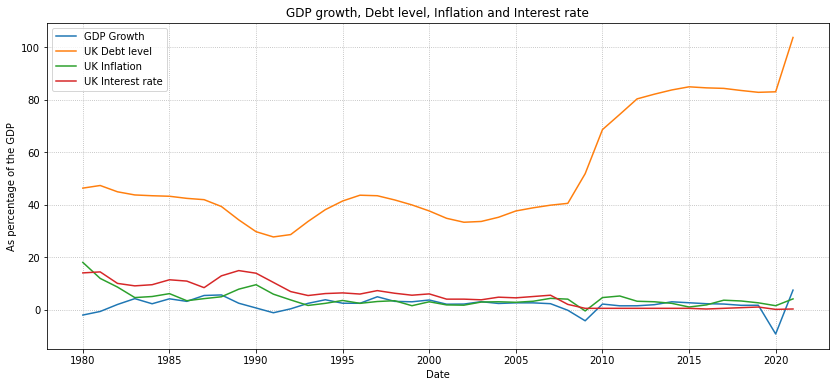

In [51]:
# Let's compare some variables to see how they behave on the same chart
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df['GDP_growth'], label='GDP Growth')
plt.plot(df.Date, df['Debt_%_of_GDP'], label='UK Debt level')
plt.plot(df.Date, df['Inflation'], label='UK Inflation')
plt.plot(df.Date, df['Interest_rate'], label='UK Interest rate')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('As percentage of the GDP')
plt.title('GDP growth, Debt level, Inflation and Interest rate')
plt.grid(True, linestyle=':')
plt.show()

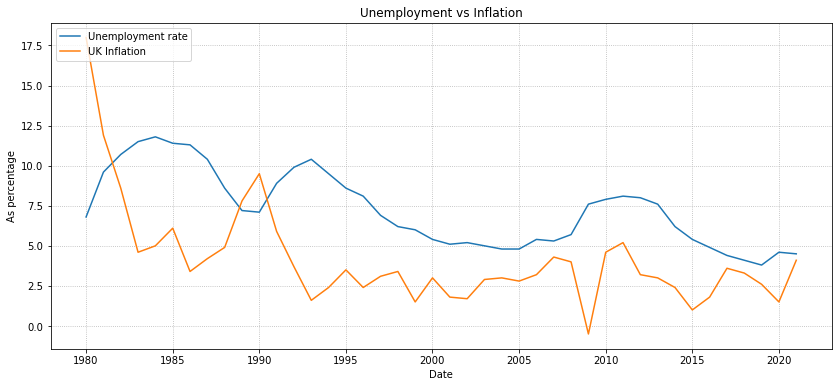

In [52]:
# Let's compare some variables to see how they behave on the same chart
rcParams['figure.figsize'] = 14,6
plt.plot(df.Date, df['Unemp'], label='Unemployment rate')
plt.plot(df.Date, df['Inflation'], label='UK Inflation')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('As percentage')
plt.title('Unemployment vs Inflation')
plt.grid(True, linestyle=':')
plt.show()

### Correlation Matrix 

In [53]:
corre_Matrix = df.corr()
print (corre_Matrix)

                     GDP_growth  real_GDP_per_capta  Debt_%_of_GDP  Inflation  \
GDP_growth             1.000000           -0.034693      -0.061302  -0.119431   
real_GDP_per_capta    -0.034693            1.000000       0.531097  -0.604509   
Debt_%_of_GDP         -0.061302            0.531097       1.000000  -0.188726   
Inflation             -0.119431           -0.604509      -0.188726   1.000000   
Unemp                  0.126237           -0.796569      -0.373417   0.264355   
Trade_balance_%_GDP   -0.219737           -0.644474      -0.009911   0.484414   
Interest_rate          0.108918           -0.868468      -0.677091   0.684072   

                        Unemp  Trade_balance_%_GDP  Interest_rate  
GDP_growth           0.126237            -0.219737       0.108918  
real_GDP_per_capta  -0.796569            -0.644474      -0.868468  
Debt_%_of_GDP       -0.373417            -0.009911      -0.677091  
Inflation            0.264355             0.484414       0.684072  
Unemp      

#### Insights from the Correlation Matrix

##### The main points are: Real GDP per capita is negative correlated to inflation, unemployement, Trade Balance and Interest rate. The reasons are easy to understand, inflation curbs the purchasing power of the UK population and therefore make them poorer similar to unemployment, when unemployment is high  households make less money, which contributes to a decrease in GDP per capita.  However, what is interesting to see is the positive relationship between debt level and real GDP per capita, which suggest the importance of the government to promote equality and avoid pooverty. 

##### It is also important to note the negative weak correlation between inflation and debt level, which is counter-intuitive at this stage

##### Further tests are required in order to have deeper understanding of the data

<AxesSubplot:xlabel='real_GDP_per_capta', ylabel='Inflation'>

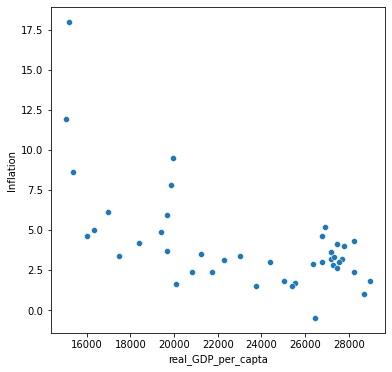

In [54]:
# Let's graphicaly see if there is a relation between real gdp per capita and inflation
plt.figure(figsize=(6,6))
#sns.boxplot(x='Real gdp', data=df)
sns.scatterplot(x='real_GDP_per_capta',y='Inflation', data=df)
# As expected, the loer the inflation level higher is the real gdp per capita

<AxesSubplot:xlabel='Debt_%_of_GDP', ylabel='Inflation'>

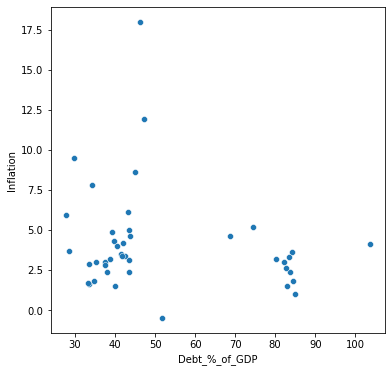

In [55]:
# Let's graphicaly see if there is a relation between debt level and inflation
plt.figure(figsize=(6,6))
#sns.boxplot(x='Real gdp', data=df)
sns.scatterplot(x='Debt_%_of_GDP',y='Inflation', data=df)
# As expected, the loer the inflation level higher is the real gdp per capita

### Stationary Test

In [56]:
df.columns

Index(['Date', 'GDP_growth', 'real_GDP_per_capta', 'Debt_%_of_GDP',
       'Inflation', 'Unemp', 'Trade_balance_%_GDP', 'Interest_rate'],
      dtype='object')

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
# GDP-growth Augmented Dickey-Fuller test
X = df['GDP_growth'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -5.916656
p-value: 0.000000
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject H0 - Time Series is stationary


In [59]:
# real GDP_per Capita Augmented Dickey-Fuller test
X = df['real_GDP_per_capta'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -2.038617
p-value: 0.269902
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Failed to reject H0 - Time Series is non-stationary


In [60]:
# Debt_%_level of the GDP Augmented Dickey-Fuller test
X = df['Debt_%_of_GDP'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: 3.392090
p-value: 1.000000
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
Failed to reject H0 - Time Series is non-stationary


In [61]:
# Inflation Augmented Dickey-Fuller test
X = df['Inflation'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -5.908160
p-value: 0.000000
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject H0 - Time Series is stationary


In [62]:
# Unemployment Augmented Dickey-Fuller test
X = df['Unemp'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -2.394028
p-value: 0.143429
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607
Failed to reject H0 - Time Series is non-stationary


In [63]:
# Trade_balance_%_GDP Augmented Dickey-Fuller test
X = df['Trade_balance_%_GDP'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -2.706842
p-value: 0.072862
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Failed to reject H0 - Time Series is non-stationary


In [64]:
# Interest_rate Augmented Dickey-Fuller test
X = df['Interest_rate'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -0.822216
p-value: 0.812509
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Failed to reject H0 - Time Series is non-stationary


In [65]:
# In order to carry on with the analysis we need to transform the non stationary data into stationary.

# Let's first apply the ''Differencing'' technique 

In [66]:
# the Non stationary variables are: 

# Real GDP per capita
# Debt level of the GDP
# Unemp
# Trade Balance
# Interest rate

In [67]:
df.columns

Index(['Date', 'GDP_growth', 'real_GDP_per_capta', 'Debt_%_of_GDP',
       'Inflation', 'Unemp', 'Trade_balance_%_GDP', 'Interest_rate'],
      dtype='object')

In [68]:
# Differencing

In [69]:
df['diff_real_GDP_per_capita'] = df['real_GDP_per_capta'] - df['real_GDP_per_capta'].shift(1)

<AxesSubplot:>

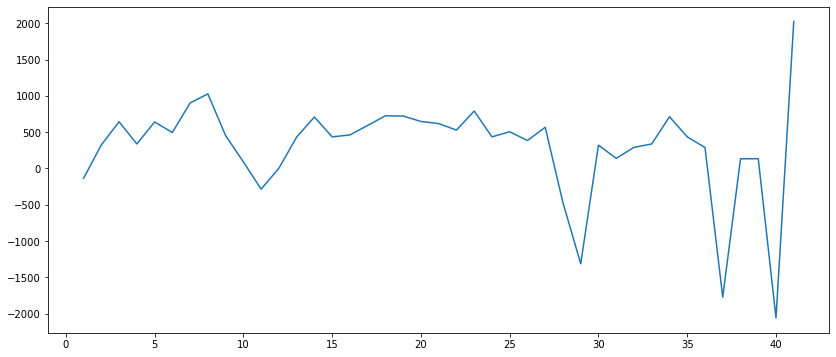

In [70]:
df['diff_real_GDP_per_capita'].dropna().plot()

In [71]:
df['diff_Debt_%_of_GDP'] = df['Debt_%_of_GDP'] - df['Debt_%_of_GDP'].shift(1)

<AxesSubplot:>

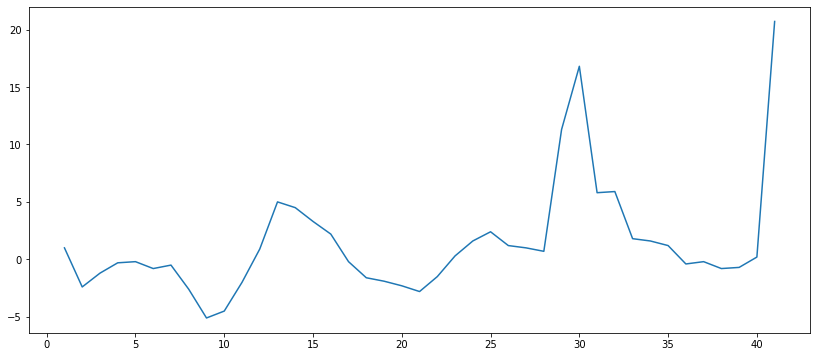

In [72]:
df['diff_Debt_%_of_GDP'].dropna().plot()

In [73]:
df['diff_Unemp'] = df['Unemp'] - df['Unemp'].shift(1)

<AxesSubplot:>

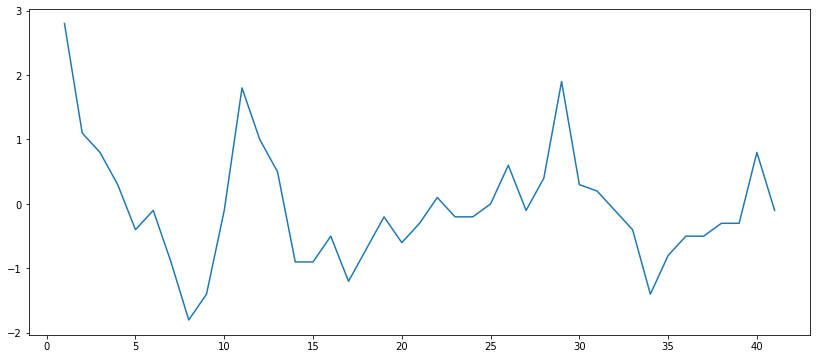

In [74]:
df['diff_Unemp'].dropna().plot()

In [75]:
df['diff_Trade_balance_%_GDP'] = df['Trade_balance_%_GDP'] - df['Trade_balance_%_GDP'].shift(1)

<AxesSubplot:>

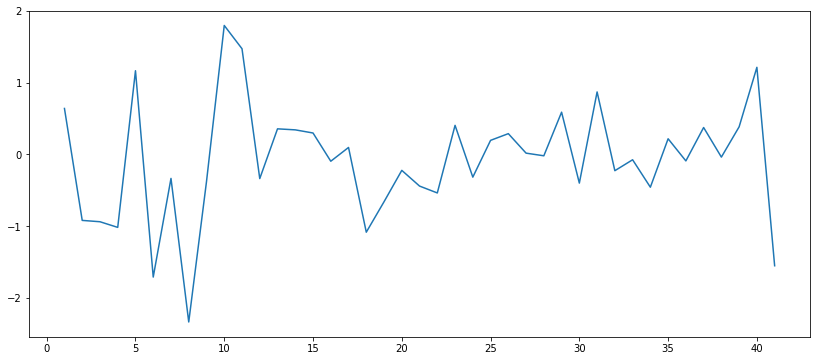

In [76]:
df['diff_Trade_balance_%_GDP'].dropna().plot()

In [77]:
df['diff_Interest_rate'] = df['Interest_rate'] - df['Interest_rate'].shift(1)

<AxesSubplot:>

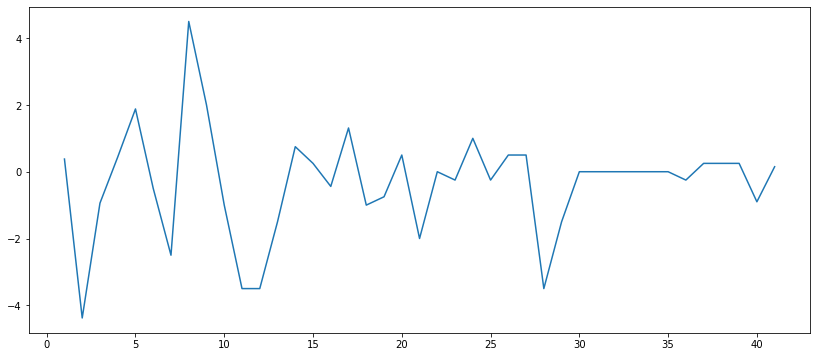

In [78]:
df['diff_Interest_rate'].dropna().plot()

In [79]:
# Let's drop these non stationary columns since they are useless for our analysis 
df.drop(['real_GDP_per_capta', 'Debt_%_of_GDP', 'Unemp', 'Trade_balance_%_GDP', 'Interest_rate'], 1, inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_5336\239659619.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['real_GDP_per_capta', 'Debt_%_of_GDP', 'Unemp', 'Trade_balance_%_GDP', 'Interest_rate'], 1, inplace=True)


In [80]:
df

,Date,GDP_growth,Inflation,diff_real_GDP_per_capita,diff_Debt_%_of_GDP,diff_Unemp,diff_Trade_balance_%_GDP,diff_Interest_rate
0,1980-01-01,-2.059,18.0,NaN,NaN,NaN,NaN,NaN
1,1981-01-01,-0.693,11.9,-135.0,1.0,2.8,0.6396,0.38
2,1982-01-01,1.971,8.6,325.0,-2.4,1.1,-0.9199,-4.38
3,1983-01-01,4.198,4.6,644.0,-1.2,0.8,-0.9386,-0.94
4,1984-01-01,2.241,5.0,338.0,-0.3,0.3,-1.0172,0.44
5,1985-01-01,4.125,6.1,641.0,-0.2,-0.4,1.1653,1.88
6,1986-01-01,3.155,3.4,496.0,-0.8,-0.1,-1.7094,-0.50
7,1987-01-01,5.396,4.2,903.0,-0.5,-0.9,-0.3349,-2.50
8,1988-01-01,5.602,4.9,1028.0,-2.6,-1.8,-2.3351,4.50
9,1989-01-01,2.444,7.8,453.0,-5.1,-1.4,-0.3798,2.00


In [81]:
df.dropna()

,Date,GDP_growth,Inflation,diff_real_GDP_per_capita,diff_Debt_%_of_GDP,diff_Unemp,diff_Trade_balance_%_GDP,diff_Interest_rate
1,1981-01-01,-0.693,11.9,-135.0,1.0,2.8,0.6396,0.38
2,1982-01-01,1.971,8.6,325.0,-2.4,1.1,-0.9199,-4.38
3,1983-01-01,4.198,4.6,644.0,-1.2,0.8,-0.9386,-0.94
4,1984-01-01,2.241,5.0,338.0,-0.3,0.3,-1.0172,0.44
5,1985-01-01,4.125,6.1,641.0,-0.2,-0.4,1.1653,1.88
6,1986-01-01,3.155,3.4,496.0,-0.8,-0.1,-1.7094,-0.50
7,1987-01-01,5.396,4.2,903.0,-0.5,-0.9,-0.3349,-2.50
8,1988-01-01,5.602,4.9,1028.0,-2.6,-1.8,-2.3351,4.50
9,1989-01-01,2.444,7.8,453.0,-5.1,-1.4,-0.3798,2.00
10,1990-01-01,0.634,9.5,91.0,-4.5,-0.1,1.7960,-1.00


In [82]:
df.rename(columns = {'diff_real_GDP_per_capita':'real_GDP_per_capita', 'diff_Debt_%_of_GDP':'Debt_%_of_GDP','diff_Unemp':'Unemp','diff_Trade_balance_%_GDP':'Trade_balance_%_GDP','diff_Interest_rate':'Interest_rate'}, inplace = True)

In [83]:
df

,Date,GDP_growth,Inflation,real_GDP_per_capita,Debt_%_of_GDP,Unemp,Trade_balance_%_GDP,Interest_rate
0,1980-01-01,-2.059,18.0,NaN,NaN,NaN,NaN,NaN
1,1981-01-01,-0.693,11.9,-135.0,1.0,2.8,0.6396,0.38
2,1982-01-01,1.971,8.6,325.0,-2.4,1.1,-0.9199,-4.38
3,1983-01-01,4.198,4.6,644.0,-1.2,0.8,-0.9386,-0.94
4,1984-01-01,2.241,5.0,338.0,-0.3,0.3,-1.0172,0.44
5,1985-01-01,4.125,6.1,641.0,-0.2,-0.4,1.1653,1.88
6,1986-01-01,3.155,3.4,496.0,-0.8,-0.1,-1.7094,-0.50
7,1987-01-01,5.396,4.2,903.0,-0.5,-0.9,-0.3349,-2.50
8,1988-01-01,5.602,4.9,1028.0,-2.6,-1.8,-2.3351,4.50
9,1989-01-01,2.444,7.8,453.0,-5.1,-1.4,-0.3798,2.00


In [84]:
df.dropna()

,Date,GDP_growth,Inflation,real_GDP_per_capita,Debt_%_of_GDP,Unemp,Trade_balance_%_GDP,Interest_rate
1,1981-01-01,-0.693,11.9,-135.0,1.0,2.8,0.6396,0.38
2,1982-01-01,1.971,8.6,325.0,-2.4,1.1,-0.9199,-4.38
3,1983-01-01,4.198,4.6,644.0,-1.2,0.8,-0.9386,-0.94
4,1984-01-01,2.241,5.0,338.0,-0.3,0.3,-1.0172,0.44
5,1985-01-01,4.125,6.1,641.0,-0.2,-0.4,1.1653,1.88
6,1986-01-01,3.155,3.4,496.0,-0.8,-0.1,-1.7094,-0.50
7,1987-01-01,5.396,4.2,903.0,-0.5,-0.9,-0.3349,-2.50
8,1988-01-01,5.602,4.9,1028.0,-2.6,-1.8,-2.3351,4.50
9,1989-01-01,2.444,7.8,453.0,-5.1,-1.4,-0.3798,2.00
10,1990-01-01,0.634,9.5,91.0,-4.5,-0.1,1.7960,-1.00


In [85]:
df.drop([0])

,Date,GDP_growth,Inflation,real_GDP_per_capita,Debt_%_of_GDP,Unemp,Trade_balance_%_GDP,Interest_rate
1,1981-01-01,-0.693,11.9,-135.0,1.0,2.8,0.6396,0.38
2,1982-01-01,1.971,8.6,325.0,-2.4,1.1,-0.9199,-4.38
3,1983-01-01,4.198,4.6,644.0,-1.2,0.8,-0.9386,-0.94
4,1984-01-01,2.241,5.0,338.0,-0.3,0.3,-1.0172,0.44
5,1985-01-01,4.125,6.1,641.0,-0.2,-0.4,1.1653,1.88
6,1986-01-01,3.155,3.4,496.0,-0.8,-0.1,-1.7094,-0.50
7,1987-01-01,5.396,4.2,903.0,-0.5,-0.9,-0.3349,-2.50
8,1988-01-01,5.602,4.9,1028.0,-2.6,-1.8,-2.3351,4.50
9,1989-01-01,2.444,7.8,453.0,-5.1,-1.4,-0.3798,2.00
10,1990-01-01,0.634,9.5,91.0,-4.5,-0.1,1.7960,-1.00


In [86]:
df.isna().sum().sort_values(ascending=False)

real_GDP_per_capita    1
Debt_%_of_GDP          1
Unemp                  1
Trade_balance_%_GDP    1
Interest_rate          1
Date                   0
GDP_growth             0
Inflation              0
dtype: int64

In [87]:
df.dropna()

,Date,GDP_growth,Inflation,real_GDP_per_capita,Debt_%_of_GDP,Unemp,Trade_balance_%_GDP,Interest_rate
1,1981-01-01,-0.693,11.9,-135.0,1.0,2.8,0.6396,0.38
2,1982-01-01,1.971,8.6,325.0,-2.4,1.1,-0.9199,-4.38
3,1983-01-01,4.198,4.6,644.0,-1.2,0.8,-0.9386,-0.94
4,1984-01-01,2.241,5.0,338.0,-0.3,0.3,-1.0172,0.44
5,1985-01-01,4.125,6.1,641.0,-0.2,-0.4,1.1653,1.88
6,1986-01-01,3.155,3.4,496.0,-0.8,-0.1,-1.7094,-0.50
7,1987-01-01,5.396,4.2,903.0,-0.5,-0.9,-0.3349,-2.50
8,1988-01-01,5.602,4.9,1028.0,-2.6,-1.8,-2.3351,4.50
9,1989-01-01,2.444,7.8,453.0,-5.1,-1.4,-0.3798,2.00
10,1990-01-01,0.634,9.5,91.0,-4.5,-0.1,1.7960,-1.00


In [88]:
df.isnull().sum()

Date                   0
GDP_growth             0
Inflation              0
real_GDP_per_capita    1
Debt_%_of_GDP          1
Unemp                  1
Trade_balance_%_GDP    1
Interest_rate          1
dtype: int64

In [89]:
np.any(~np.isfinite(df),axis=0)

Date                   False
GDP_growth             False
Inflation              False
real_GDP_per_capita     True
Debt_%_of_GDP           True
Unemp                   True
Trade_balance_%_GDP     True
Interest_rate           True
dtype: bool

In [90]:
df=df.fillna(df.mean()) # this is to fill the missing data with the mean of each variable

C:\Users\andre\AppData\Local\Temp\ipykernel_5336\781684006.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df=df.fillna(df.mean()) # this is to fill the missing data with the mean of each variable


In [91]:
# real GDP_per Capita Augmented Dickey-Fuller test
X = df['real_GDP_per_capita'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -3.279602
p-value: 0.015815
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Reject H0 - Time Series is stationary


In [92]:
# Debt_%_level of the GDP Augmented Dickey-Fuller test
X = df['Debt_%_of_GDP'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -0.110598
p-value: 0.948373
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
Failed to reject H0 - Time Series is non-stationary


In [93]:
# Unemp Augmented Dickey-Fuller test
X = df['Unemp'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -3.601504
p-value: 0.005732
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject H0 - Time Series is stationary


In [94]:
# Trade_balance_%_GDP Augmented Dickey-Fuller test
X = df['Trade_balance_%_GDP'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -5.982908
p-value: 0.000000
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject H0 - Time Series is stationary


In [95]:
# Interest_rate Augmented Dickey-Fuller test
X = df['Interest_rate'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -4.127458
p-value: 0.000872
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Reject H0 - Time Series is stationary


In [96]:
# Let's differencing debt in one more

df['diff_Debt_%_of_GDP'] = df['Debt_%_of_GDP'] - df['Debt_%_of_GDP'].shift(1)

<AxesSubplot:>

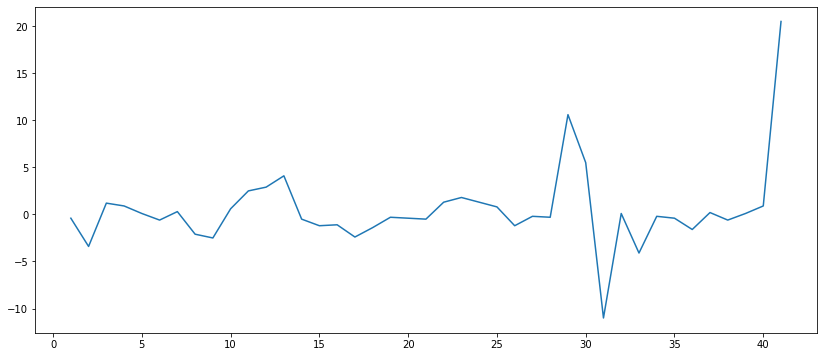

In [97]:
df['diff_Debt_%_of_GDP'].dropna().plot()

In [98]:
df.head

<bound method NDFrame.head of          Date  GDP_growth  Inflation  real_GDP_per_capita  Debt_%_of_GDP  \
0  1980-01-01      -2.059       18.0           299.341463            1.4   
1  1981-01-01      -0.693       11.9          -135.000000            1.0   
2  1982-01-01       1.971        8.6           325.000000           -2.4   
3  1983-01-01       4.198        4.6           644.000000           -1.2   
4  1984-01-01       2.241        5.0           338.000000           -0.3   
5  1985-01-01       4.125        6.1           641.000000           -0.2   
6  1986-01-01       3.155        3.4           496.000000           -0.8   
7  1987-01-01       5.396        4.2           903.000000           -0.5   
8  1988-01-01       5.602        4.9          1028.000000           -2.6   
9  1989-01-01       2.444        7.8           453.000000           -5.1   
10 1990-01-01       0.634        9.5            91.000000           -4.5   
11 1991-01-01      -1.186        5.9          -285.000000 

In [99]:
df.dropna()

,Date,GDP_growth,Inflation,real_GDP_per_capita,Debt_%_of_GDP,Unemp,Trade_balance_%_GDP,Interest_rate,diff_Debt_%_of_GDP
1,1981-01-01,-0.693,11.9,-135.0,1.0,2.8,0.6396,0.38,-0.4
2,1982-01-01,1.971,8.6,325.0,-2.4,1.1,-0.9199,-4.38,-3.4
3,1983-01-01,4.198,4.6,644.0,-1.2,0.8,-0.9386,-0.94,1.2
4,1984-01-01,2.241,5.0,338.0,-0.3,0.3,-1.0172,0.44,0.9
5,1985-01-01,4.125,6.1,641.0,-0.2,-0.4,1.1653,1.88,0.1
6,1986-01-01,3.155,3.4,496.0,-0.8,-0.1,-1.7094,-0.50,-0.6
7,1987-01-01,5.396,4.2,903.0,-0.5,-0.9,-0.3349,-2.50,0.3
8,1988-01-01,5.602,4.9,1028.0,-2.6,-1.8,-2.3351,4.50,-2.1
9,1989-01-01,2.444,7.8,453.0,-5.1,-1.4,-0.3798,2.00,-2.5
10,1990-01-01,0.634,9.5,91.0,-4.5,-0.1,1.7960,-1.00,0.6


In [100]:
np.any(~np.isfinite(df),axis=0)

Date                   False
GDP_growth             False
Inflation              False
real_GDP_per_capita    False
Debt_%_of_GDP          False
Unemp                  False
Trade_balance_%_GDP    False
Interest_rate          False
diff_Debt_%_of_GDP      True
dtype: bool

In [101]:
df=df.fillna(df.mean()) # this is to fill the missing data with the mean of each variable

C:\Users\andre\AppData\Local\Temp\ipykernel_5336\781684006.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df=df.fillna(df.mean()) # this is to fill the missing data with the mean of each variable


In [102]:
# Debt_%_level of the GDP Augmented Dickey-Fuller test
X = df['diff_Debt_%_of_GDP'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is stationary")
else:
    print("Failed to reject H0 - Time Series is non-stationary")

ADF Statistic: -4.797060
p-value: 0.000055
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618
Reject H0 - Time Series is stationary


In [103]:
df.columns

Index(['Date', 'GDP_growth', 'Inflation', 'real_GDP_per_capita',
       'Debt_%_of_GDP', 'Unemp', 'Trade_balance_%_GDP', 'Interest_rate',
       'diff_Debt_%_of_GDP'],
      dtype='object')

In [104]:
df.drop(['Debt_%_of_GDP'], 1, inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_5336\2745056043.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Debt_%_of_GDP'], 1, inplace=True)


In [105]:
df.rename(columns = {'diff_Debt_%_of_GDP':'Debt_%_of_GDP'}, inplace = True)

In [106]:
df.head()

,Date,GDP_growth,Inflation,real_GDP_per_capita,Unemp,Trade_balance_%_GDP,Interest_rate,Debt_%_of_GDP
0,1980-01-01,-2.059,18.0,299.341463,-0.056098,-0.084766,-0.335366,0.470732
1,1981-01-01,-0.693,11.9,-135.000000,2.800000,0.639600,0.380000,-0.400000
2,1982-01-01,1.971,8.6,325.000000,1.100000,-0.919900,-4.380000,-3.400000
3,1983-01-01,4.198,4.6,644.000000,0.800000,-0.938600,-0.940000,1.200000
4,1984-01-01,2.241,5.0,338.000000,0.300000,-1.017200,0.440000,0.900000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

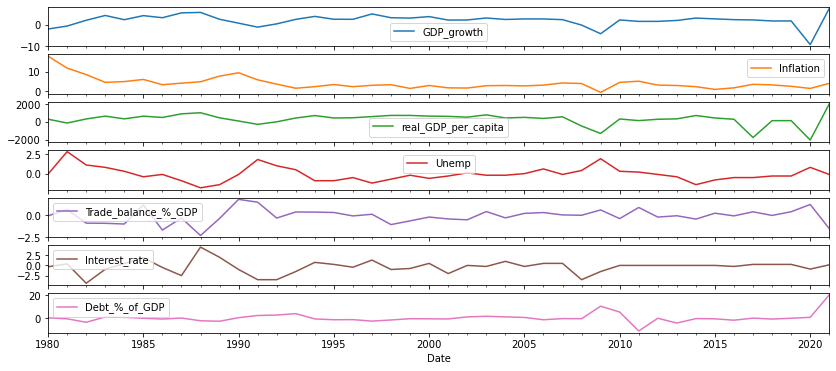

In [107]:
#plot all variables
df.set_index('Date')[['GDP_growth','Inflation','real_GDP_per_capita','Unemp','Trade_balance_%_GDP','Interest_rate','Debt_%_of_GDP']].plot(subplots=True)

#### As we now have the dataset stationary we can implement a linear regression model, but first we need to define y and x, therefore, we'll start with y = Real GDP per Capita, which means that we want to to understand what is the impact of the other variables on y.


## Linear Regression

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [109]:
df.columns

Index(['Date', 'GDP_growth', 'Inflation', 'real_GDP_per_capita', 'Unemp',
       'Trade_balance_%_GDP', 'Interest_rate', 'Debt_%_of_GDP'],
      dtype='object')

In [110]:
X = np.asarray(df[['GDP_growth','Inflation','Unemp','Trade_balance_%_GDP','Interest_rate','Debt_%_of_GDP']])
X[0:5]

array([[-2.059     , 18.        , -0.05609756, -0.08476585, -0.33536585,
         0.47073171],
       [-0.693     , 11.9       ,  2.8       ,  0.6396    ,  0.38      ,
        -0.4       ],
       [ 1.971     ,  8.6       ,  1.1       , -0.9199    , -4.38      ,
        -3.4       ],
       [ 4.198     ,  4.6       ,  0.8       , -0.9386    , -0.94      ,
         1.2       ],
       [ 2.241     ,  5.        ,  0.3       , -1.0172    ,  0.44      ,
         0.9       ]])

In [111]:
y = np.asarray(df['real_GDP_per_capita'])
y[0:5]

array([ 299.34146341, -135.        ,  325.        ,  644.        ,
        338.        ])

In [112]:
# train_test_split(x, y, random_state=1)
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [113]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print(len(x_train),len(y_train))

x_train: (33, 6)
x_test: (9, 6)
y_train: (33,)
y_test: (9,)
33 33


In [114]:
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [115]:
import statsmodels.api as sm

In [116]:
# linReg.fit(x_train, y_train)

model =sm.OLS(x_train,y_train)
results = model.fit()
print('linRegBeta =',linReg.coef_)
print()
print("linRegIntercept = ",linReg.intercept_)


linRegBeta = [ 195.23909875   40.9027957  -103.15080573  -28.8940373   -31.79178617
   20.82868328]

linRegIntercept =  -216.41544909924397


In [117]:
y_hat =linReg.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test))**2) # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error 
print('MSE=',mse)
print()
print(mse,rmse)

MSE= 551235.4219437848

551235.4219437848 742.4523028072475


In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test, y_hat)}')

MAE: 373.7098518340682


In [119]:
help(linReg)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [120]:
linReg.score(x_train,y_train)

0.9437839173717523

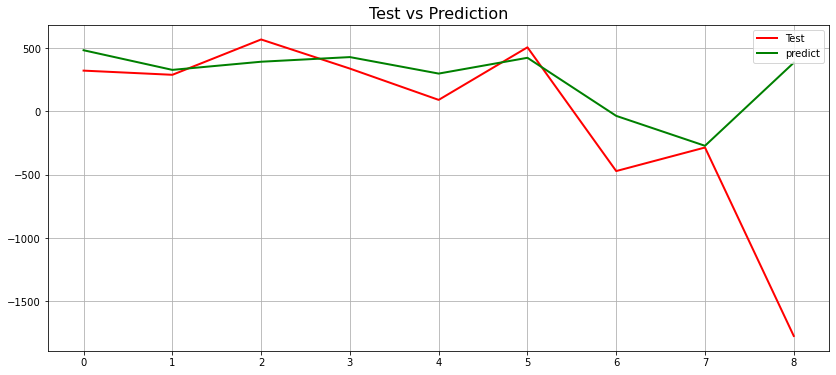

In [121]:
t= np.arange(len(x_test))
plt.plot(t,y_test,'r-',linewidth = 2,label = 'Test')
plt.plot(t,y_hat,'g-',linewidth = 2,label = 'predict')
plt.title("Test vs Prediction",fontsize = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

#### It is interesting to see how the model is capable of predicting reasonably ok until a certain point, then the ''Black Swan'' effect takes place e.g. Covid-19, Wars etc... 

#### Predicting a future GDP per Capita

In [122]:
df.columns

Index(['Date', 'GDP_growth', 'Inflation', 'real_GDP_per_capita', 'Unemp',
       'Trade_balance_%_GDP', 'Interest_rate', 'Debt_%_of_GDP'],
      dtype='object')

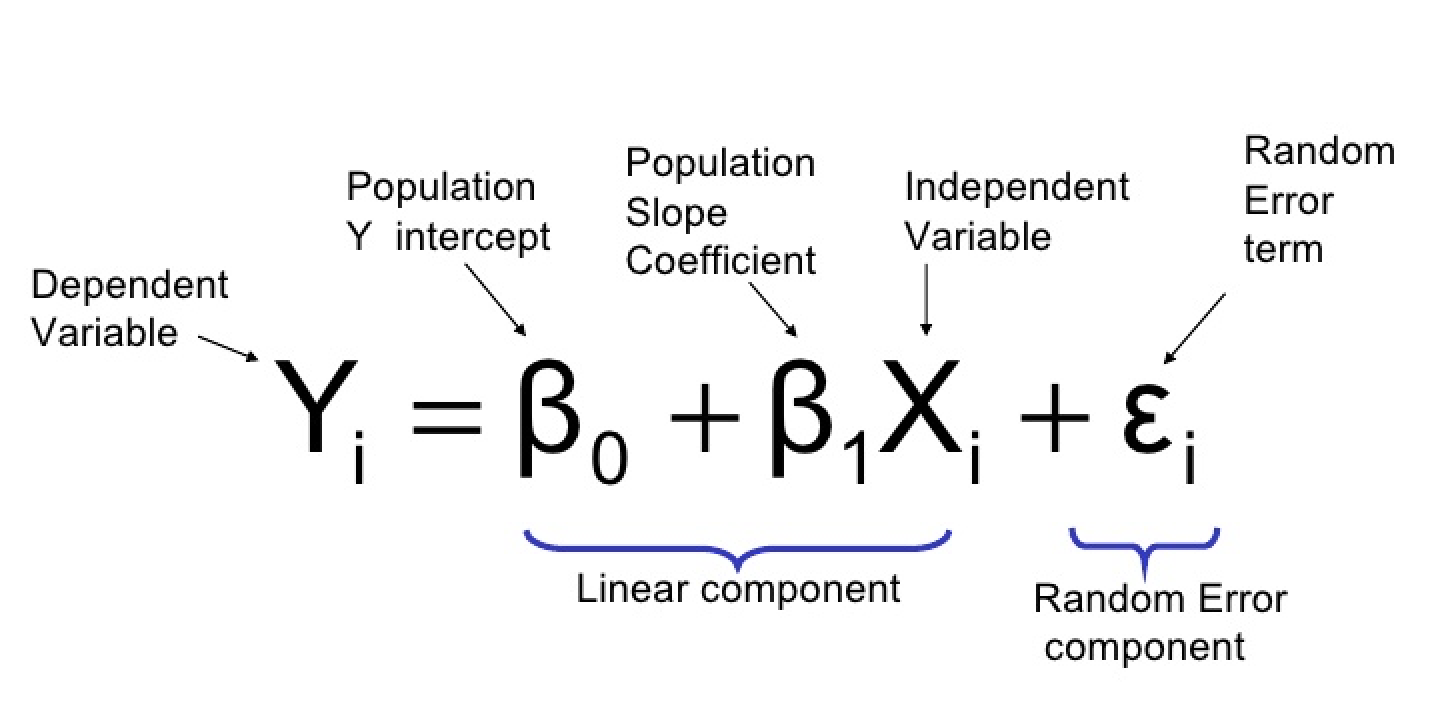

In [123]:
# y = 'real_GDP_per_capita'

# x = Growth,'Inflation', 'Unemp',
       #'Trade_balance_%_GDP', 'Interest_rate', 'Debt_%_of_GDP'

B0 =  -216.41544909924397 # Intercept

B1 = 195.23909875
B2 = 40.9027957
B3 = -103.15080573
B4 = -28.8940373
B5 = -31.79178617
B6 = 20.82868328

e = 373.7098518340682 # Mean Absolute error

In [124]:
#[ 195.23909875   40.9027957  -103.15080573  -28.8940373   -31.79178617
#   20.82868328]

In [190]:
Growth = -3.44     # 4%
Inflation = 5.9    # 9%
Unemp = 1          # 5.5%
Trade_B = -0.74    # -2%
Interest_r = 2     # 2%
Debt = -7.7        # 98%

In [191]:
Y_GDP_per_Capita = B0 + (B1*Growth) + (B2*Inflation) + (B3*Unemp) + (B4*Trade_B) + (B5*Interest_r) + (B6*Debt) - e

In [192]:
Y_GDP_per_Capita 

-1326.1549577273122

In [193]:
# X - 27433 = -1326.1549577273122
# X = £26,116.85 (minus the error term)

In [194]:
Y_GDP_per_Capita_2 = B0 + (B1*Growth) + (B2*Inflation) + (B3*Unemp) + (B4*Trade_B) + (B5*Interest_r) + (B6*Debt) + e

In [195]:
Y_GDP_per_Capita_2

-578.7352540591759

In [196]:
# X - 27433 = -578.7352540591759
# X = 26,864.26 (plus the error term)

### According to the model, if we have the following output for X... thus, UK growth at 4%, inflation at 9%, Unemployment rate at 5.5%, Trade balance in defict of -2%, Interest rate at 2% and Debt level at 98% of the GDP, the predicted GDP per Capita is in between £26,864 and £26,116. It wil be either a decrease of -2.1% or -4.8% from 2021. 

In [197]:
# Reading the Coefficients

# Holding all other features fixed, a 1% increase in GDP increases GDP per capita on average £195
# Holding all other features fixed, a 1% increase in inflation increases GDP per capita on average £40
# Holding all other features fixed, a 1% increase in unemployment rate decreases GDP per capita on average -£103
# Holding all other features fixed, a 1% increase in the trade balance decreases GDP per capita on average -£28.9
# Holding all other features fixed, a 1% increase in interest rate decreases GDP per capita on average -£31.8
# Holding all other features fixed, a 1% increase in Debt level increases GDP per capita on average £20.83